# Analysis

## Preparation of the Environment

### Import libraries

In [2]:
import sys
sys.path.append("..")

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicorn_analysis.utils.analysis_functions as uf
import unicorn_analysis.visualization.analysis_graphs as vg

### Define styles

In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

### Load data

In [5]:
df = pd.read_csv(os.path.join(os.getcwd(), os.pardir, 'data', 'processed', 'unicorn_companies_prepared.csv'))
df = df.astype({'Date Joined': 'datetime64', 'Industry': 'category', 'Continent': 'category'})
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."


## Questions

### Over the years, more companies became unicorns?

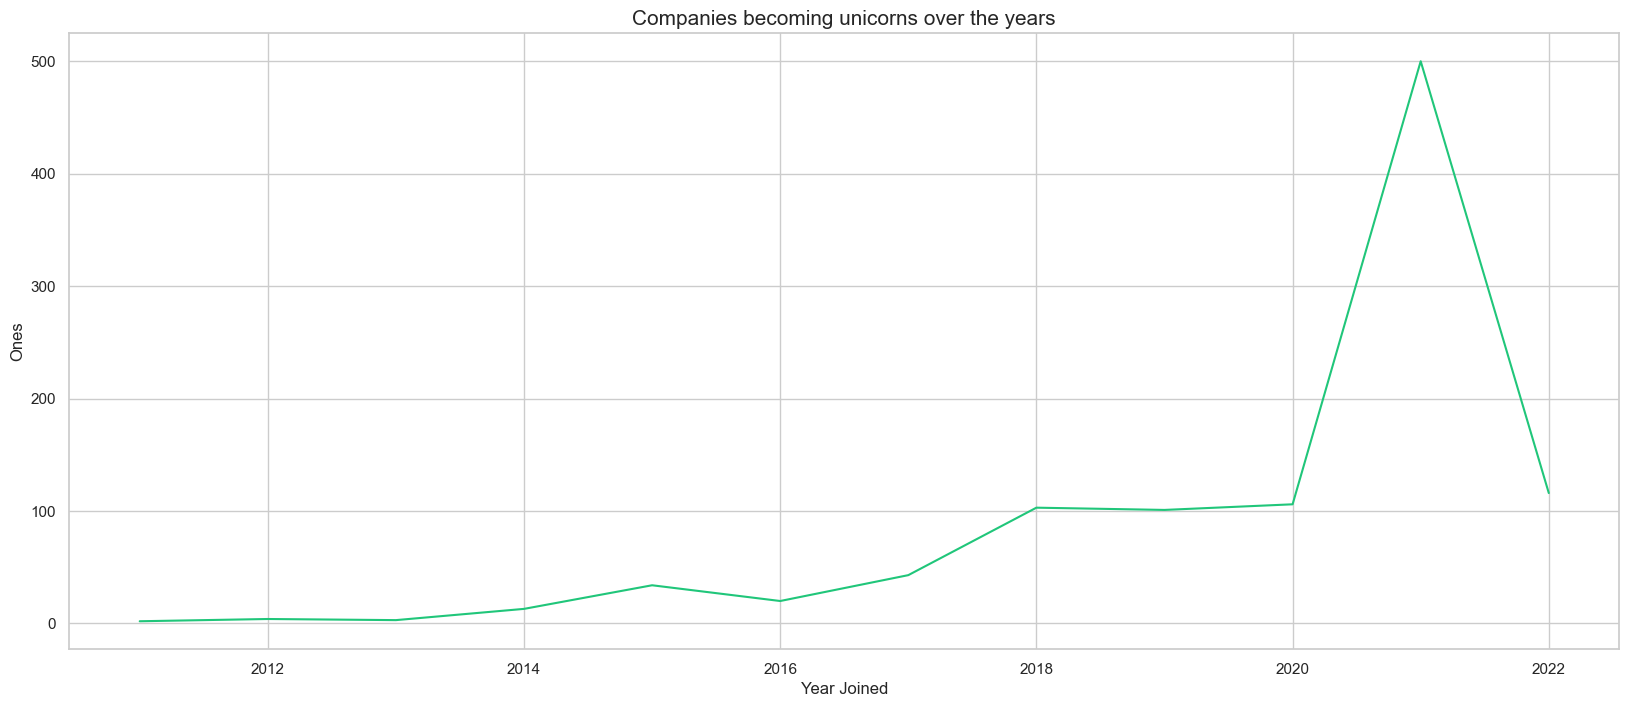

In [6]:
df_unicorns_trending = df[['Date Joined']].copy()
df_unicorns_trending['Ones'] = 1
df_unicorns_trending['Year Joined'] = df_unicorns_trending['Date Joined'].dt.year

vg.companies_became_unicorns_trend(df_unicorns_trending, 'Year Joined', 'Ones', [20,8], "Companies becoming unicorns over the years")

In this graph we can see how there is a growing trend for more companies to become unicorns and even more so after the pandemic where we can indeed see that there were many that joined this list in that period due to its great potential.

### What are the top 5 most highly valued and funded companies?

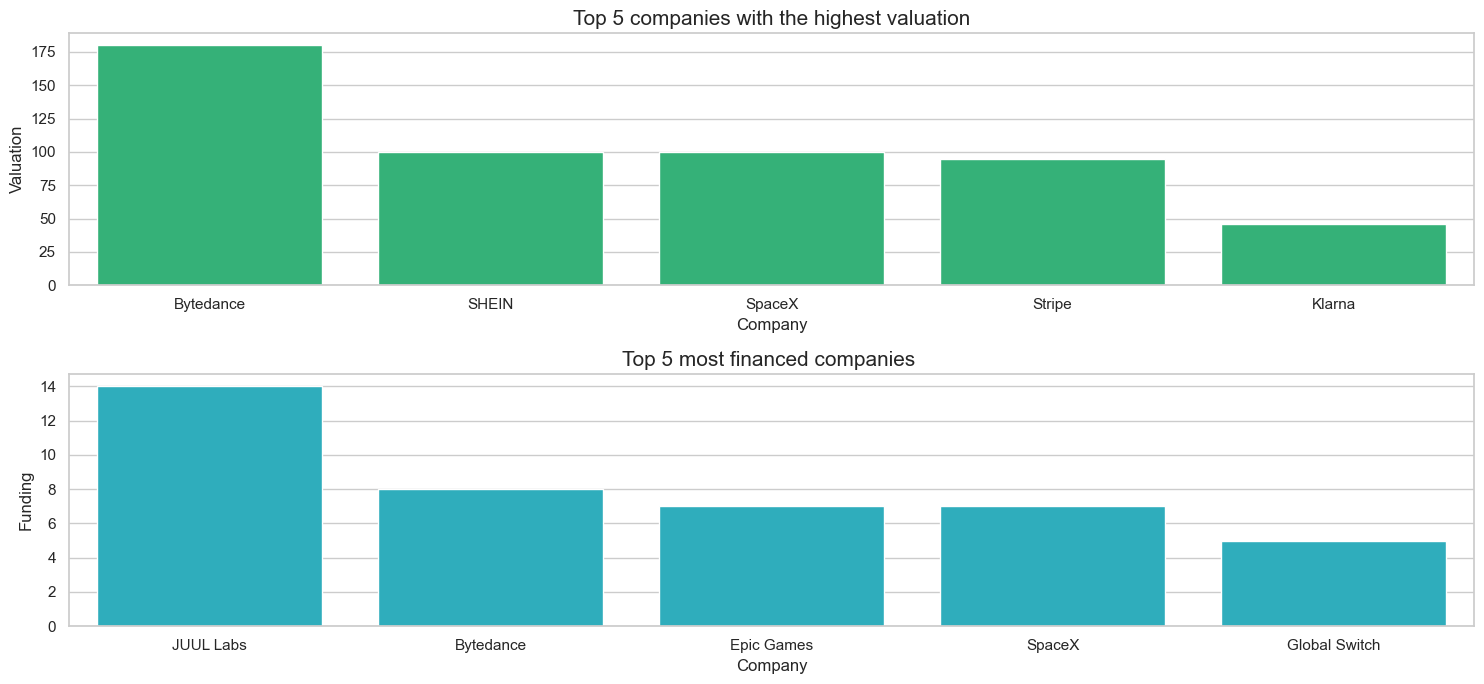

In [7]:
vg.top_5_companies(df, 'Company', 'Valuation', 'Funding', [15,7], "Top 5 companies with the highest valuation", "Top 5 most financed companies ")

### Which is the country with the highest return per company?

In [8]:
df[df.Company == 'Otto Bock HealthCare']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
187,Otto Bock HealthCare,4,2017-06-24,Health,Duderstadt,Germany,Europe,1919,0.0,EQT Partners


This company Otto Bock HealthCare as we see is the company that started with 0 amount of investment and this is understandable because we see that it was founded in 1919 so we must put ourselves in the context of that time. In the next analysis this company can create certain calculation problems and biases because it had an incalculable return because it started from 0, so we will exclude it from the data set.

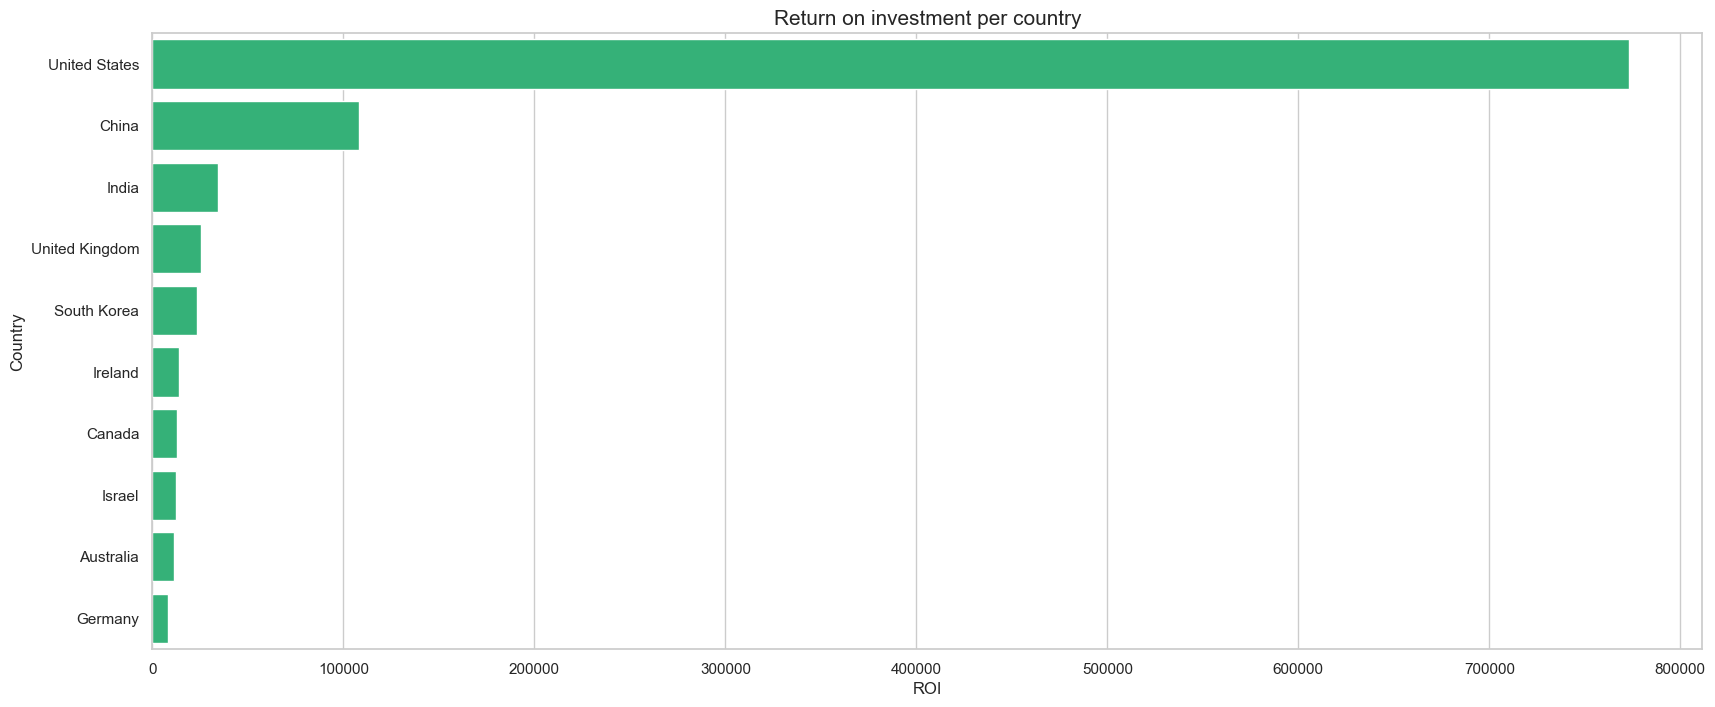

In [9]:
df_without_otto = df[df.Company != 'Otto Bock HealthCare'].copy()

df_return_per_country = df_without_otto[['Country', 'Industry']].copy() 
df_return_per_country['ROI'] = uf.calculate_ROI(df_without_otto, 'Valuation', 'Funding')

vg.countries_with_high_ROI_per_company(df_return_per_country, 'Country', 'ROI', [20,8], "Return on investment per country")

### What is the industry with the highest return in that country?

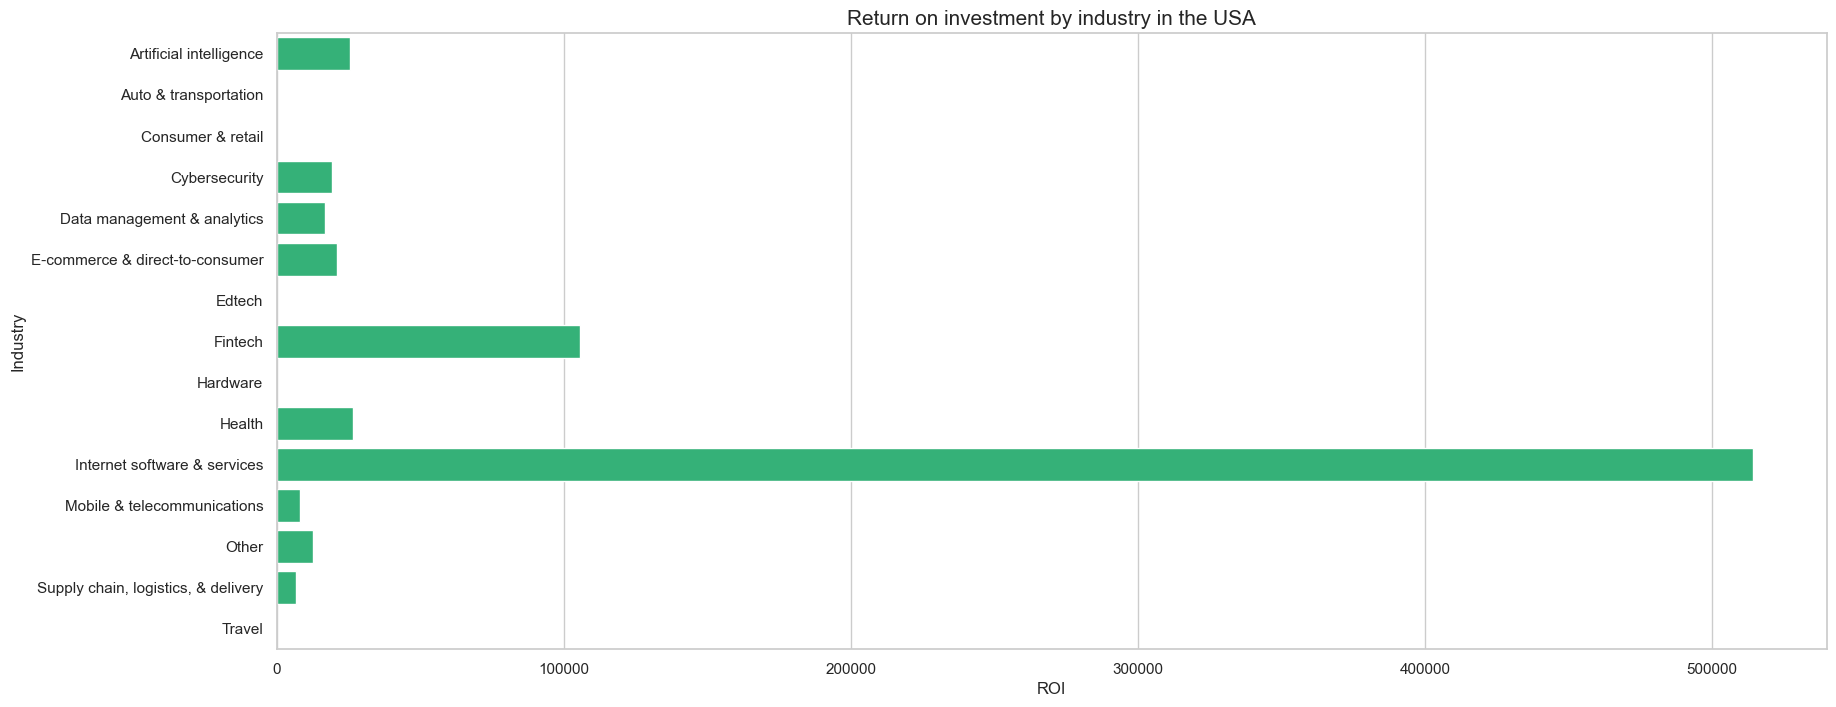

In [10]:
df_return_us = df_return_per_country[df_return_per_country.Country == 'United States'].copy()

vg.industry_with_high_ROI_US(df_return_us, 'Industry', 'ROI', [20,8], "Return on investment by industry in the USA")

### Has that industry always had a high return or has it increased over time?

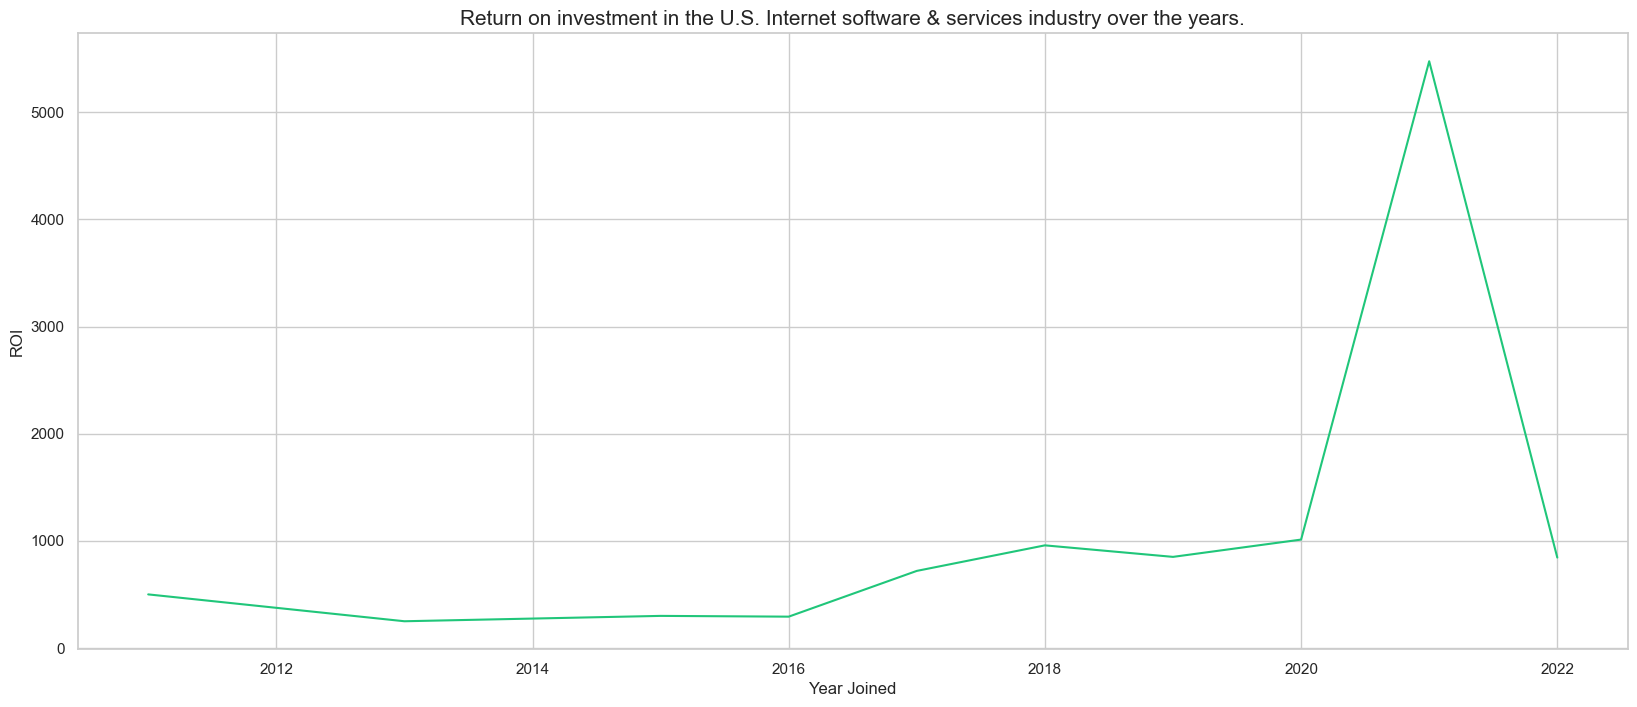

In [11]:
df_us_iss = df[(df.Country == 'United States') & (df.Industry == 'Internet software & services')].copy()
df_us_iss['ROI'] = uf.calculate_ROI(df_us_iss, 'Valuation', 'Funding')
df_us_iss['Year Joined'] = df_us_iss['Date Joined'].dt.year

vg.ROI_trend(df_us_iss, 'Year Joined', 'ROI', [20,8], "Return on investment in the U.S. Internet software & services industry over the years.")

### If we create a company in the 'Internet software & services' industry in the United States and we are sure that it can be a unicorn company, how long will it take to become a unicorn?

In [14]:
print("It would take about {} years to become a unicorn company.".format(
    round((df_us_iss['Year Joined'] - df_us_iss['Year Founded']).mean(), 0)
))

It would take about 8.0 years to become a unicorn company.
